# 5. Word-to-vector Analysis
<hr>
After doing some sentiment analysis and emotion analysis, I have been able to find the 8 most common emotions that represent the data I have extracted and analysed. I am doing word-to-vector because my physical representation of the data requires 8 relevant words grouped in 2. To group them, I will use spacy and spicy, which will help me to measure how similar are these words between themselves.

In [1]:
import spacy
from scipy import spatial
import numpy as np

In [2]:
import spacy
#spacy.cli.download("en_core_web_trf")

In [4]:
nlp = spacy.load('en_core_web_lg')

### Cosine similarity.
- If the final value is 1, it means that the words are the same
- If the final value is closer to 1, it means that the words are somehow similar
- If the final value is closer or equal to 0, it means that the words are different

In [5]:
tokens = nlp('positive trust anticipation negative joy fear sadness anger')

for t1 in tokens:
    for t2 in tokens:
        #print(t1.text,t2.text,t1.similarity(t2))
        similarity = t1.similarity(t2)
        if similarity > 0.6:
            print('cosine similarity between',t1.text, 'and',t2.text, 'is:', similarity)
            

cosine similarity between positive and positive is: 1.0
cosine similarity between positive and negative is: 0.8790249824523926
cosine similarity between trust and trust is: 1.0
cosine similarity between anticipation and anticipation is: 1.0
cosine similarity between negative and positive is: 0.8790249824523926
cosine similarity between negative and negative is: 1.0
cosine similarity between joy and joy is: 1.0
cosine similarity between joy and sadness is: 0.6499127149581909
cosine similarity between fear and fear is: 1.0
cosine similarity between fear and sadness is: 0.6564838886260986
cosine similarity between fear and anger is: 0.7523291707038879
cosine similarity between sadness and joy is: 0.6499127149581909
cosine similarity between sadness and fear is: 0.6564838886260986
cosine similarity between sadness and sadness is: 1.0
cosine similarity between sadness and anger is: 0.7101796865463257
cosine similarity between anger and fear is: 0.7523291707038879
cosine similarity between a

In [6]:
# import sys
# !{sys.executable} -m pip install gensim


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: c:\users\diana\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [46]:
# import sys
# !{sys.executable} -m pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
      --------------------------------------- 0.2/8.4 MB 5.8 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/8.4 MB 6.0 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/8.4 MB 5.1 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.4 MB 5.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.4 MB 5.7 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/8.4 MB 5.3 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/8.4 MB 5.7 MB/s eta 0:00:02
     --------- ------------------------------ 2.1/8.4 MB 5.5 MB/s eta 0:00:02
     ---------- ----------------------------- 2.3/8.4 MB 5.6 MB/s eta 0:00:02
     ------------ --------------------------- 2.5/8.4 MB 5.5 MB/s eta 0:00:02
     ------------- -------------------------- 2.8/8.4 MB 5.3 MB/s eta 0:00:02
     -------------- ------------------------- 3.1/8.4 MB 5.5 MB/s eta 0


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: c:\users\diana\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [6]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [84]:
tokens = [
    ['positive', 
     'trust', 
     'anticipation', 
     'negative', 
     'joy', 
     'fear', 
     'sadness', 
     'anger']
]

In [85]:
# Create CBOW model
model = gensim.models.Word2Vec(tokens, min_count = 1,
                              vector_size = 200000, window = 5)
##200000 vector size worked

In [87]:
similarity=  model.wv.most_similar("negative", topn=3)
for i in similarity:
    print(i)

('positive', 0.0040717096999287605)
('trust', 0.0024236778263002634)
('sadness', 0.0012841515708714724)


In [70]:
tokensvtwo = [
    
    'positive', 
     'trust', 
     'anticipation', 
     'negative', 
     'joy', 
     'fear', 
     'sadness', 
     'anger'
]
X = model.wv[tokensvtwo]
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

## Semantic relationship graph

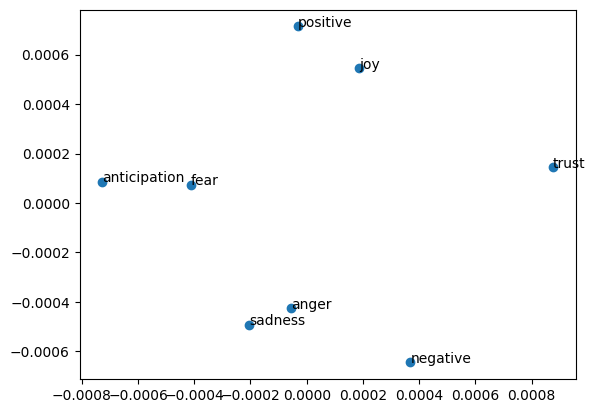

In [71]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(tokensvtwo):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Cosine Similarity using Gensim

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
token1 = 'sadness'
token2 = 'anger'
vector1 = model.wv[token1]
vector2 = model.wv[token2]

##calculate cosine similarity

cosine_sim= cosine_similarity([vector1], [vector2])[0][0]
print(cosine_sim)

similarity_threshold = 0.5

# Compare cosine similarity against the threshold
if cosine_sim > similarity_threshold:
    print(f"The tokens '{token1}' and '{token2}' are similar.")
else:
    print(f"The tokens '{token1}' and '{token2}' are dissimilar.")


-0.0024669997
The tokens 'sadness' and 'anger' are dissimilar.


In [74]:
print("Cosine similarity between 'sadness' " +
               "and 'anger' - CBOW : ",
    model.wv.similarity('sadness', 'anger'))

Cosine similarity between 'sadness' and 'anger' - CBOW :  -0.0024669988


In [75]:
print("Cosine similarity between 'anticipation' " +
               "and 'trust' - CBOW : ",
    model.wv.similarity('anticipation', 'trust'))

Cosine similarity between 'anticipation' and 'trust' - CBOW :  -0.005595846


In [76]:
for t1 in tokens:
    for t2 in tokens:
#         model = gensim.models.Word2Vec(tokens, min_count = 1,
#                               vector_size = 100, window = 5)
#         print(model.wv.similarity(t1, t2))
        print((t1, t2))
       
            

(['positive', 'trust', 'anticipation', 'negative', 'joy', 'fear', 'sadness', 'anger', 'fright'], ['positive', 'trust', 'anticipation', 'negative', 'joy', 'fear', 'sadness', 'anger', 'fright'])


In [9]:
finalTokens= [
     'positive', 
     'trust', 
     'anticipation', 
     'negative', 
     'joy', 
     'fear', 
     'sadness', 
     'anger',
    
]

for i in finalTokens:
    print(i)
    print(model.wv.most_similar(i))

positive
[('joy', 0.0013782888418063521), ('anticipation', 0.0013228420866653323), ('sadness', 0.0003440550935920328), ('negative', 0.0002851614844985306), ('anger', 0.00024771649623289704), ('fright', 0.00015517424617428333), ('fear', 7.904101948952302e-05), ('trust', -0.0012242303928360343)]
trust
[('fear', 0.0012816041707992554), ('joy', 0.001117040985263884), ('sadness', 0.001084833755157888), ('fright', 0.000754711392801255), ('anger', 4.104587424080819e-05), ('anticipation', -0.0011995573295280337), ('positive', -0.0012242302764207125), ('negative', -0.0016581065719947219)]
anticipation
[('positive', 0.001322842901572585), ('fright', 0.0011060453252866864), ('sadness', 0.00028687785379588604), ('joy', -0.00022468873066827655), ('negative', -0.0011086765443906188), ('trust', -0.0011995563982054591), ('anger', -0.00133418885525316), ('fear', -0.0018487871857360005)]
negative
[('fear', 0.0012981236213818192), ('joy', 0.001095814979635179), ('fright', 0.0008161002187989652), ('positi

In [11]:
print(model.wv['fear'])

[ 7.5758578e-08 -1.4587449e-07  3.8995492e-07 ...  3.1456483e-07
 -3.2421266e-07 -6.1963033e-07]


In [10]:
print(model.wv['fright'])

[-5.3622724e-08  2.3643135e-08  5.1033498e-07 ... -7.2163402e-07
 -9.5109630e-07  7.5647114e-07]
